In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyClassifier
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

%matplotlib inline

In [2]:
df= pd.read_csv('FIFA19.csv'  , encoding='latin-1')

//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (67,68) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,Player Name,Overall,Club,League,Nationality,Position,Age,Height (cm),Weight (Kg),Pace,...,CM,RM,LM,CAM,CF,RF,LF,RW,LW,ST
0,Lionel Messi,95,FC Barcelona,LaLiga Santander,Argentina,CF,31,170,72,89,...,85,91,91,94,94,94,94,93,93,90
1,C. Ronaldo dos Santos Aveiro,94,Juventus,Serie A TIM,Portugal,ST,33,187,83,90,...,81,88,88,88,91,91,91,90,90,92
2,Kevin De Bruyne,92,Manchester City,Premier League,Belgium,CAM,27,181,70,78,...,88,89,89,89,88,88,88,88,88,83
3,Luis SuÌÁrez,92,FC Barcelona,LaLiga Santander,Uruguay,ST,31,182,86,81,...,81,86,86,87,89,89,89,87,87,88
4,Sergio Ramos GarcÌ_a,92,Real Madrid,LaLiga Santander,Spain,CB,32,184,82,76,...,75,72,72,70,70,70,70,70,70,72


In [4]:
df.columns

Index(['Player Name', 'Overall', 'Club', 'League', 'Nationality', 'Position',
       'Age', 'Height (cm)', 'Weight (Kg)', 'Pace', 'Acceleration',
       'Sprint Speed', 'Dribbling', 'Agility', 'Balance', 'Reactions',
       'Ball Control', 'Composure', 'Shooting', 'Positioning', 'Finishing',
       'Shot Power', 'Long Shots', 'Volleys', 'Penalties', 'Passing', 'Vision',
       'Crossing', 'Free Kick', 'Short Pass', 'Long Pass', 'Pass Curve',
       'Defending', 'Interceptions', 'Heading', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Physicality', 'Jumping', 'Stamina', 'Strength',
       'Aggression', 'Diving', 'Reflexes', 'Handling', 'Speed', 'Kicking',
       'Positoning', 'Preferred Foot', 'Attacking Workrate',
       'Defensive Workrate', 'Weak Foot', 'Skill Moves', 'CB', 'RB', 'LB',
       'RWB', 'LWB', 'CDM', 'CM', 'RM', 'LM', 'CAM', 'CF', 'RF', 'LF', 'RW',
       'LW', 'ST'],
      dtype='object')

In [52]:
cols_stats = ['Overall',
              'Dribbling',
              'Agility',
              'Balance',
              'Reactions',
              'Ball Control',
              'Shooting',
              'Finishing',
              'Shot Power',
              'Long Shots',
              'Volleys',
              'Penalties',
               'Heading',
              'Short Pass', 
              'Long Pass', 
              'Defending', 
              'Interceptions', 
              'Marking',
              
              'Standing Tackle',
              'Sliding Tackle', 
              'Physicality', 
              'Jumping', 
              'Stamina', 
              'Strength',
              'Aggression',
              'Passing',
              'Vision',
              'Crossing', 
              'Free Kick', 
              
              'Pass Curve',
              'Pace', 
              'Acceleration',
              'Sprint Speed',
              'Positioning',
              'Composure',
              'Position']

In [53]:
df = df[cols_stats]

In [54]:
df = df[df["Position"] != 'GK']

In [55]:
df.isnull().values.any()


False

In [56]:
p = df['Position'].str.split().apply(lambda x: x[0]).unique()
p

array(['CF', 'ST', 'CAM', 'CB', 'CM', 'LW', 'CDM', 'RW', 'LB', 'LM', 'RM',
       'RB', 'RWB', 'LWB'], dtype=object)

In [57]:
df_new = df.copy()
df_new.drop(df_new.index, inplace=True)

for i in p:
    df_temp = df[df['Position'].str.contains(i)]
    df_temp['Position'] = i
    df_new = df_new.append(df_temp, ignore_index=True)
    
df_new.iloc[::500, :]

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Overall,Dribbling,Agility,Balance,Reactions,Ball Control,Shooting,Finishing,Shot Power,Long Shots,...,Vision,Crossing,Free Kick,Pass Curve,Pace,Acceleration,Sprint Speed,Positioning,Composure,Position
0,95,97,91,95,95,97,92,96,85,95,...,95,77,95,94,89,92,86,95,97,CF
500,73,67,63,68,73,69,74,73,82,73,...,59,61,66,68,68,66,70,72,69,ST
1000,68,70,81,83,70,69,64,61,73,64,...,62,68,52,65,75,77,74,68,56,ST
1500,64,60,57,56,58,64,64,63,70,62,...,57,40,55,57,56,48,63,65,62,ST
2000,58,56,76,59,57,50,53,55,54,49,...,47,39,29,37,88,89,87,54,62,ST
2500,72,73,82,90,69,71,68,63,72,72,...,71,74,74,74,79,79,79,68,63,CAM
3000,59,64,62,67,53,64,48,52,46,44,...,55,49,43,45,67,65,68,50,57,CAM
3500,74,46,63,71,65,48,25,18,40,23,...,23,29,28,24,77,75,79,25,63,CB
4000,70,38,47,47,62,42,27,21,33,31,...,24,24,21,24,64,66,62,26,59,CB
4500,67,51,61,61,61,52,26,20,41,21,...,35,23,26,34,56,50,61,25,49,CB


Text(22, 100, 'Mixed Attributes')

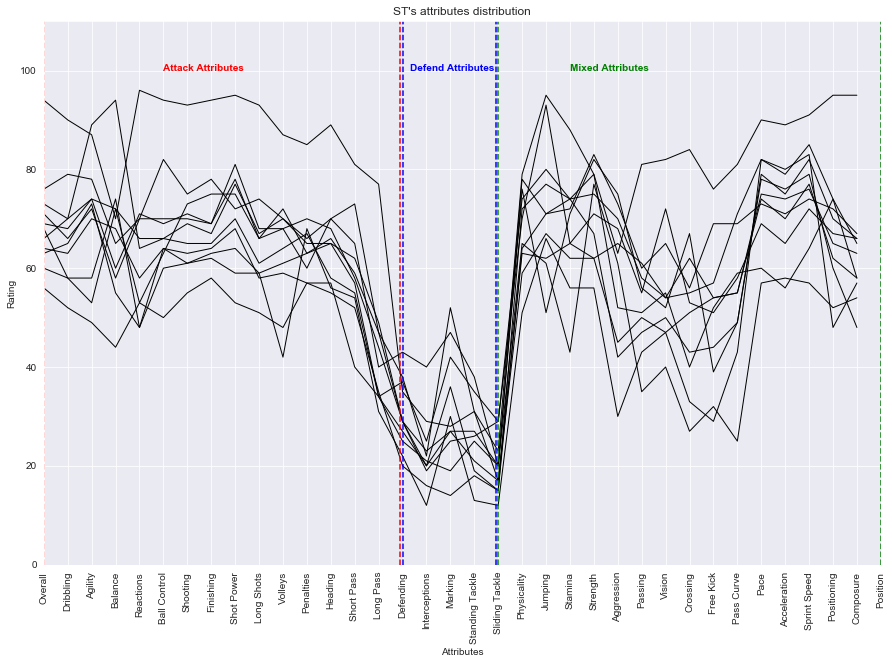

In [70]:
fig, ax = plt.subplots()
df_new_ST = df_new[df_new['Position'] == 'ST'].iloc[::200,:-1]
df_new_ST.T.plot.line(color = 'black', figsize = (15,10), legend = False, ylim = (0, 110), title = "ST's attributes distribution", ax=ax)

ax.set_xlabel('Attributes')
ax.set_ylabel('Rating')

ax.set_xticks(np.arange(len(cols_stats)))
ax.set_xticklabels(labels = cols_stats, rotation=90)

for ln in ax.lines:
    ln.set_linewidth(1)

ax.axvline(0, color='red', linestyle='--')   
ax.axvline(14.9, color='red', linestyle='--')

ax.axvline(15, color='blue', linestyle='--')
ax.axvline(18.9, color='blue', linestyle='--')

ax.axvline(19, color='green', linestyle='--')
ax.axvline(35, color='green', linestyle='--')

ax.text(5, 100, 'Attack Attributes', color = 'red', weight = 'bold')
ax.text(15.3, 100, 'Defend Attributes', color = 'blue', weight = 'bold')
ax.text(22, 100, 'Mixed Attributes', color = 'green', weight = 'bold')

Text(22, 0.07, 'Mixed Attributes')

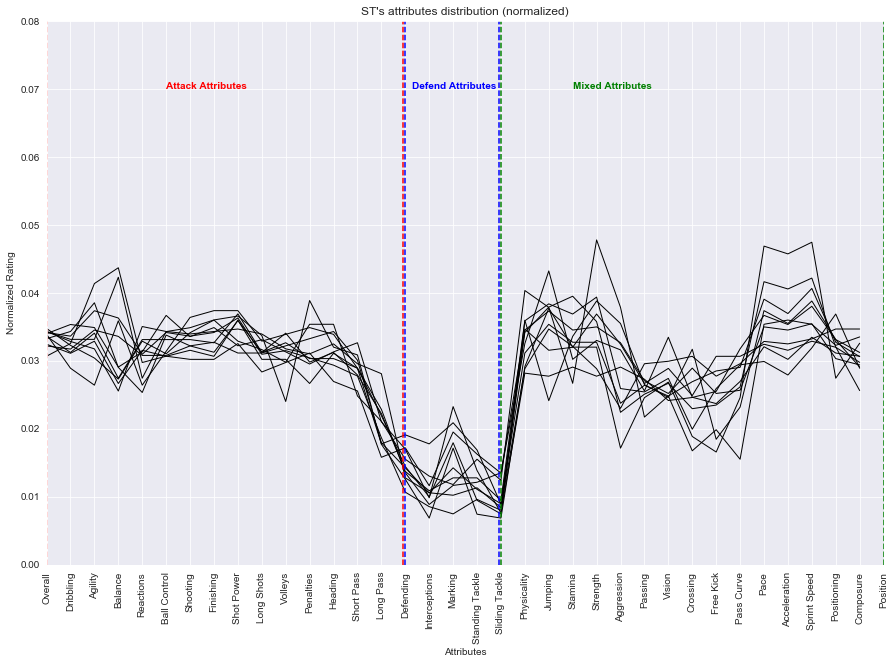

In [76]:
df_new_ST_normalized = df_new_ST.div(df_new_ST.sum(axis=1), axis=0)

fig, ax = plt.subplots()
df_new_ST_normalized.T.plot.line(color = 'black', figsize = (15,10), ylim = (0, 0.08), legend = False, title = "ST's attributes distribution (normalized)", ax=ax)

ax.set_xlabel('Attributes')
ax.set_ylabel('Normalized Rating')

ax.set_xticks(np.arange(len(cols_stats)))
ax.set_xticklabels(labels = cols_stats, rotation=90)

for ln in ax.lines:
    ln.set_linewidth(1)

ax.axvline(0, color='red', linestyle='--')   
ax.axvline(14.9, color='red', linestyle='--')

ax.axvline(15, color='blue', linestyle='--')
ax.axvline(18.9, color='blue', linestyle='--')

ax.axvline(19, color='green', linestyle='--')
ax.axvline(35, color='green', linestyle='--')

ax.text(5, 0.07, 'Attack Attributes', color = 'red', weight = 'bold')
ax.text(15.3, 0.07, 'Defend Attributes', color = 'blue', weight = 'bold')
ax.text(22, 0.07, 'Mixed Attributes', color = 'green', weight = 'bold') 

Text(22, 100, 'Mixed Attributes')

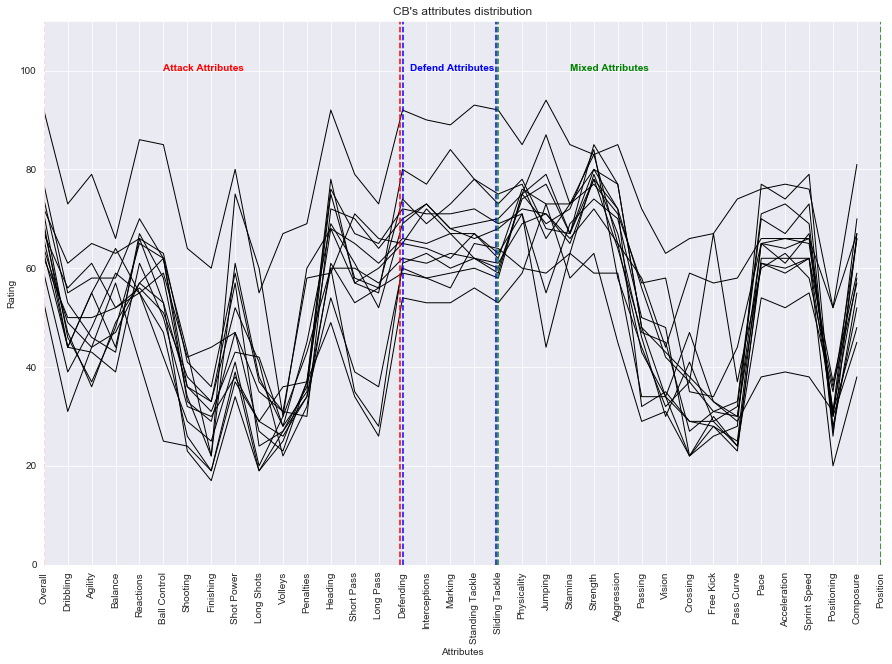

In [71]:
fig, ax = plt.subplots()
df_new_CB = df_new[df_new['Position'] == 'CB'].iloc[::200,:-1]
df_new_CB.T.plot.line(color = 'black', figsize = (15,10), legend = False, ylim = (0, 110), title = "CB's attributes distribution", ax=ax)

ax.set_xlabel('Attributes')
ax.set_ylabel('Rating')

ax.set_xticks(np.arange(len(cols_stats)))
ax.set_xticklabels(labels = cols_stats, rotation=90)

for ln in ax.lines:
    ln.set_linewidth(1)

ax.axvline(0, color='red', linestyle='--')   
ax.axvline(14.9, color='red', linestyle='--')

ax.axvline(15, color='blue', linestyle='--')
ax.axvline(18.9, color='blue', linestyle='--')

ax.axvline(19, color='green', linestyle='--')
ax.axvline(35, color='green', linestyle='--')

ax.text(5, 100, 'Attack Attributes', color = 'red', weight = 'bold')
ax.text(15.3, 100, 'Defend Attributes', color = 'blue', weight = 'bold')
ax.text(22, 100, 'Mixed Attributes', color = 'green', weight = 'bold')

Text(22, 0.07, 'Mixed Attributes')

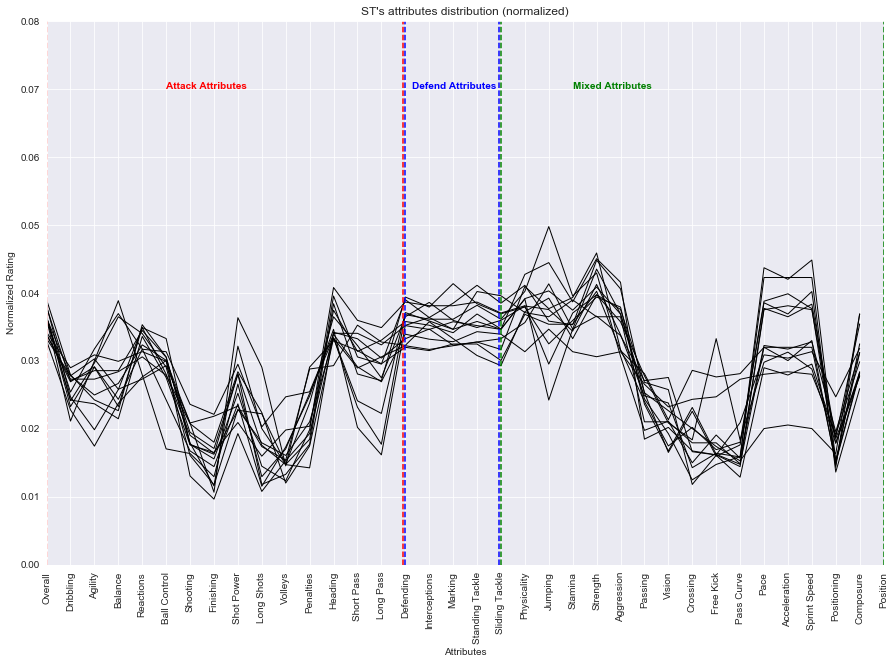

In [78]:
df_new_CB_normalized = df_new_CB.div(df_new_CB.sum(axis=1), axis=0)

fig, ax = plt.subplots()
df_new_CB_normalized.T.plot.line(color = 'black', figsize = (15,10), ylim = (0, 0.08), legend = False, title = "ST's attributes distribution (normalized)", ax=ax)

ax.set_xlabel('Attributes')
ax.set_ylabel('Normalized Rating')

ax.set_xticks(np.arange(len(cols_stats)))
ax.set_xticklabels(labels = cols_stats, rotation=90)

for ln in ax.lines:
    ln.set_linewidth(1)

ax.axvline(0, color='red', linestyle='--')   
ax.axvline(14.9, color='red', linestyle='--')

ax.axvline(15, color='blue', linestyle='--')
ax.axvline(18.9, color='blue', linestyle='--')

ax.axvline(19, color='green', linestyle='--')
ax.axvline(35, color='green', linestyle='--')

ax.text(5, 0.07, 'Attack Attributes', color = 'red', weight = 'bold')
ax.text(15.3, 0.07, 'Defend Attributes', color = 'blue', weight = 'bold')
ax.text(22, 0.07, 'Mixed Attributes', color = 'green', weight = 'bold') 

In [79]:
df_new_normalized = df_new.iloc[:,:-1].div(df_new.iloc[:,:-1].sum(axis=1), axis=0)
mapping = {'ST': 0, 'RW': 0, 'LW': 0, 'RM': 1, 'CM': 1, 'LM': 1, 'CAM': 1, 'CF': 0, 'CDM': 2, 'CB': 2, 'LB': 2, 'RB': 2, 'RWB': 2, 'LWB': 2}
df_new_normalized['Position'] = df_new['Position']
df_new_normalized = df_new_normalized.replace({'Position': mapping})

df_new_normalized.iloc[::1000,]

,Overall,Dribbling,Agility,Balance,Reactions,Ball Control,Shooting,Finishing,Shot Power,Long Shots,...,Vision,Crossing,Free Kick,Pass Curve,Pace,Acceleration,Sprint Speed,Positioning,Composure,Position
0,0.035029,0.035767,0.033555,0.035029,0.035029,0.035767,0.033923,0.035398,0.031342,0.035029,...,0.035029,0.028392,0.035029,0.034661,0.032817,0.033923,0.031711,0.035029,0.035767,0
1000,0.032258,0.033207,0.038425,0.039374,0.033207,0.032732,0.030361,0.028937,0.034630,0.030361,...,0.029412,0.032258,0.024668,0.030835,0.035579,0.036528,0.035104,0.032258,0.026565,0
2000,0.032750,0.031621,0.042914,0.033315,0.032185,0.028233,0.029927,0.031056,0.030491,0.027668,...,0.026539,0.022021,0.016375,0.020892,0.049689,0.050254,0.049125,0.030491,0.035008,0
3000,0.033221,0.036036,0.034910,0.037725,0.029842,0.036036,0.027027,0.029279,0.025901,0.024775,...,0.030968,0.027590,0.024212,0.025338,0.037725,0.036599,0.038288,0.028153,0.032095,1
4000,0.040207,0.021827,0.026996,0.026996,0.035612,0.024124,0.015508,0.012062,0.018955,0.017806,...,0.013785,0.013785,0.012062,0.013785,0.036760,0.037909,0.035612,0.014934,0.033889,2
5000,0.034670,0.028169,0.018960,0.023294,0.034128,0.031961,0.017335,0.011918,0.031961,0.013543,...,0.020043,0.023835,0.013543,0.019502,0.033586,0.034128,0.033044,0.019502,0.034670,2
6000,0.031499,0.029399,0.024360,0.028139,0.029399,0.031499,0.029819,0.031079,0.029819,0.030659,...,0.032339,0.023100,0.028139,0.028559,0.025619,0.024780,0.026459,0.031499,0.026879,1
7000,0.030627,0.029655,0.023821,0.022849,0.031599,0.030627,0.027710,0.026252,0.033058,0.030627,...,0.029655,0.021877,0.014584,0.026738,0.028683,0.027710,0.029169,0.025280,0.032086,1
8000,0.032507,0.028037,0.027631,0.025599,0.032913,0.030475,0.024380,0.023568,0.030882,0.021942,...,0.030882,0.020317,0.023974,0.025193,0.023974,0.026006,0.022349,0.026818,0.030882,2
9000,0.031959,0.029381,0.032990,0.037113,0.028866,0.029897,0.023196,0.022680,0.024227,0.025258,...,0.027835,0.019588,0.017526,0.020103,0.026804,0.026289,0.027320,0.023196,0.026289,2


In [80]:
X_train, X_test, y_train, y_test = train_test_split(df_new_normalized.iloc[:,:-1], df_new_normalized.iloc[:,-1], random_state=0)

print('X train shape: {}'.format(X_train.shape))
print('X test shape: {}'.format(X_test.shape))
print('y train shape: {}'.format(y_train.shape))
print('y test shape: {}'.format(y_test.shape))

X train shape: (10335, 35)
X test shape: (3445, 35)
y train shape: (10335,)
y test shape: (3445,)


In [100]:
clf_d = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
acc_d = clf_d.score(X_test, y_test)
print ('Dummy Classifier (most frequent class): {}'.format(acc_d))

lr = LinearRegression().fit(X_train, y_train)
acc1 = lr.score(X_test, y_test)
print ('Linear Regression Accuracy: {}'.format(acc1))

Dummy Classifier (most frequent class): 0.45341074020319305
Linear Regression Accuracy: 0.7367267818782759


In [81]:
clf_d = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
acc_d = clf_d.score(X_test, y_test)
print ('Dummy Classifier (most frequent class): {}'.format(acc_d))

clf = LogisticRegression().fit(X_train, y_train)
acc = clf.score(X_test, y_test)
print ('Logistic Regression Accuracy: {}'.format(acc))

Dummy Classifier (most frequent class): 0.45341074020319305
Logistic Regression Accuracy: 0.7741654571843251


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [82]:
Coef_list = list(sorted(zip(X_train.columns, abs(clf.coef_[0])),key=lambda x: -x[1]))
Coef_table = pd.DataFrame(np.array(Coef_list).reshape(-1,2), columns = ['Attributes', 'Coef'])

print (Coef_table)

         Attributes                 Coef
0    Sliding Tackle     13.8192167275878
1   Standing Tackle   13.628047790276552
2     Interceptions   12.358494650101287
3           Marking   10.999529724353929
4         Defending   10.737003232108256
5         Finishing   10.257306574152313
6          Shooting    7.537189476373215
7           Volleys   7.1441923552858215
8       Positioning    7.015293445317662
9         Penalties    6.487895412154959
10        Long Pass    5.928073150278828
11          Heading    4.978561096358155
12       Long Shots    4.867037125500277
13       Shot Power   4.5956013344426845
14         Strength   3.1559280148447124
15     Sprint Speed   3.0248265207542655
16         Crossing    2.930622932188945
17             Pace   2.7544513431232374
18     Acceleration    2.415503585555054
19       Aggression   2.3862883475238976
20          Jumping   2.1542616674369075
21          Passing   2.0016192047574854
22        Dribbling   1.9281906288727262
23     Ball Cont

In [83]:
target_cols = Coef_table[:10]['Attributes'].tolist()

clf_2 = LogisticRegression().fit(X_train[target_cols], y_train)
acc_2 = clf_2.score(X_test[target_cols], y_test)
print ('Logistic Regression Accuracy (10 features): {}'.format(acc_2))

Logistic Regression Accuracy (10 features): 0.6606676342525399


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


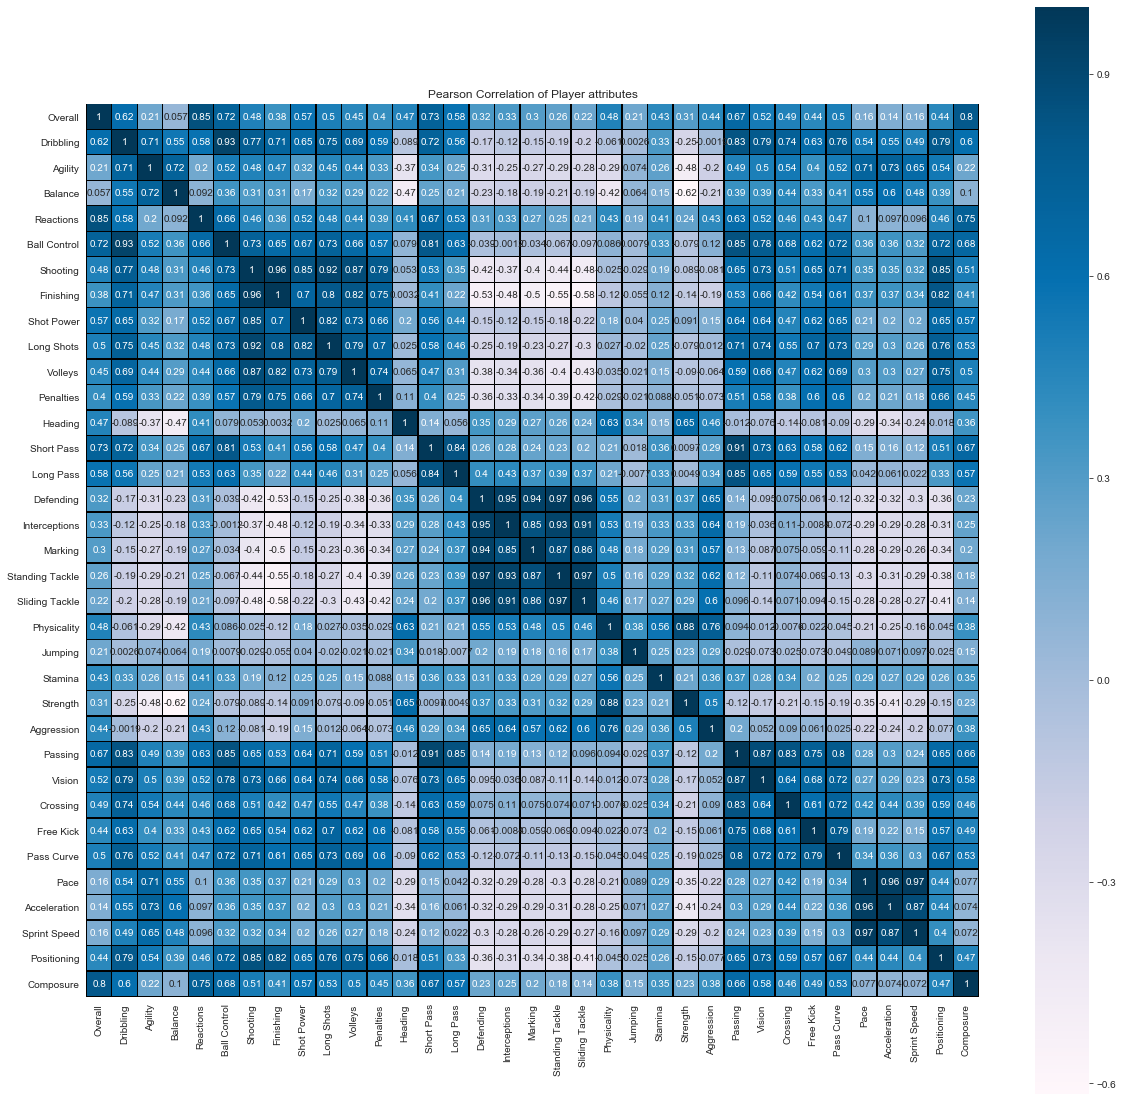

In [84]:
f, ax = plt.subplots(figsize=(20, 20))

plt.title('Pearson Correlation of Player attributes')

sns.heatmap(df_new.corr(),linewidths=0.25,vmax=1.0, square=True, cmap = 'PuBu', linecolor='black', annot=True)

[(0, 39.96184094631185), (1, 66.71384245378201), (2, 75.67829643901075), (3, 80.85261104241519), (4, 82.8496519903019), (5, 84.67431959182807), (6, 86.23624889756778), (7, 87.72535777600685), (8, 88.95251976842125), (9, 90.1168294792012), (10, 91.16131134395403), (11, 92.02634456065269), (12, 92.82789662394686), (13, 93.56970191552158), (14, 94.29506389847995), (15, 94.9677399372972), (16, 95.58514159752073), (17, 96.14480872565031), (18, 96.69028133364922), (19, 97.21138879151536), (20, 97.71159832093157), (21, 98.16161085904169), (22, 98.58912223218861), (23, 98.95427286030574), (24, 99.24997663587193), (25, 99.50005426331956), (26, 99.68902387794954), (27, 99.861363726013), (28, 99.94541824313596)]


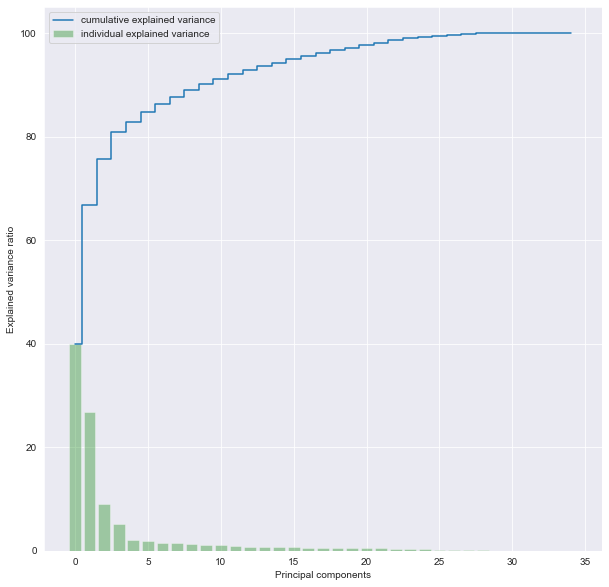

In [85]:
cov_mat = np.cov(df_new.iloc[:,:-1].T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

# Calculation of Explained Variance from the eigenvalues
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance

print(list(zip(range(29),cum_var_exp)))

# PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED 
plt.figure(figsize=(10, 10))
plt.bar(range(len(var_exp)), var_exp, alpha=0.3333, align='center', label='individual explained variance', color = 'g')
plt.step(range(len(var_exp)), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

In [86]:
pca = PCA(n_components=17)

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(df_new.iloc[:,:-1], df_new.iloc[:,-1], random_state=0)

X_train_2_pca = pca.fit_transform(X_train_2)
X_train_2_pca = pd.DataFrame(X_train_2_pca)

x_test_2_pca = pca.transform(X_test_2)

clf_17d = LogisticRegression().fit(X_train_2_pca, y_train_2)
acc_17d = clf_17d.score(x_test_2_pca, y_test_2)
print ('Logistic Regression Accuracy with PCA (17 components): {}'.format(acc_17d))

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Logistic Regression Accuracy with PCA (17 components): 0.5956458635703918


In [87]:
lda = LDA(n_components=None)

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(df_new.iloc[:,:-1], df_new.iloc[:,-1], random_state=0)

X_lda = lda.fit(X_train_3, y_train_3)

lda_var_ratios = lda.explained_variance_ratio_

# get number of components needed to explain 95% variance
def select_n_components(var_ratio, goal_var: float) -> int:
    
    total_variance = 0.0
    n_components = 0
    
    for explained_variance in var_ratio:
        total_variance += explained_variance
        n_components += 1
        if total_variance >= goal_var:
            break

    return n_components

print('Number of components needed to explain 95% variance: {}'.format(select_n_components(lda_var_ratios, 0.95)))

Number of components needed to explain 95% variance: 4


In [89]:
lda_n = LDA(n_components=4)
X_train_3_lda = lda_n.fit_transform(X_train_3, y_train_3)
X_train_3_lda = pd.DataFrame(X_train_3_lda)

X_test_3_lda = lda_n.transform(X_test_3)

clf_3d = LogisticRegression().fit(X_train_3_lda, y_train_3)
acc_3d = clf_3d.score(X_test_3_lda, y_test_3)
print ('Logistic Regression Accuracy with LDA (4 components): {}'.format(acc_3d))

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Logistic Regression Accuracy with LDA (4 components): 0.6243831640058055


In [91]:
df_new_normalized_all = df_new.copy()
mapping_all = {'ST': 0, 'RW': 1, 'LW': 2, 'RM': 3, 'CM': 4, 'LM': 5, 'CAM': 6, 'CF': 7, 'CDM': 8, 'CB': 9, 'LB': 10, 'RB': 11, 'RWB': 12, 'LWB': 13}

df_new_normalized_all = df_new_normalized_all.replace({'Position': mapping_all})
df_new_normalized_all.iloc[::1000,]

,Overall,Dribbling,Agility,Balance,Reactions,Ball Control,Shooting,Finishing,Shot Power,Long Shots,...,Vision,Crossing,Free Kick,Pass Curve,Pace,Acceleration,Sprint Speed,Positioning,Composure,Position
0,95,97,91,95,95,97,92,96,85,95,...,95,77,95,94,89,92,86,95,97,7
1000,68,70,81,83,70,69,64,61,73,64,...,62,68,52,65,75,77,74,68,56,0
2000,58,56,76,59,57,50,53,55,54,49,...,47,39,29,37,88,89,87,54,62,0
3000,59,64,62,67,53,64,48,52,46,44,...,55,49,43,45,67,65,68,50,57,6
4000,70,38,47,47,62,42,27,21,33,31,...,24,24,21,24,64,66,62,26,59,9
5000,64,52,35,43,63,59,32,22,59,25,...,37,44,25,36,62,63,61,36,64,9
6000,75,70,58,67,70,75,71,74,71,73,...,77,55,67,68,61,59,63,75,64,4
7000,63,61,49,47,65,63,57,54,68,63,...,61,45,30,55,59,57,60,52,66,4
8000,80,69,68,63,81,75,60,58,76,54,...,76,50,59,62,59,64,55,66,76,8
9000,62,57,64,72,56,58,45,44,47,49,...,54,38,34,39,52,51,53,45,51,8


In [92]:
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(df_new_normalized_all.iloc[:,:-1], df_new_normalized_all.iloc[:,-1], random_state=0)

print('X train shape: {}'.format(X_train_all.shape))
print('X test shape: {}'.format(X_test_all.shape))
print('y train shape: {}'.format(y_train_all.shape))
print('y test shape: {}'.format(y_test_all.shape))

X train shape: (10335, 35)
X test shape: (3445, 35)
y train shape: (10335,)
y test shape: (3445,)


In [93]:
clf_d_all = DummyClassifier(strategy = 'most_frequent').fit(X_train_all, y_train_all)
acc_d_all = clf_d_all.score(X_test_all, y_test_all)
print ('Dummy Classifier (most frequent class): {}'.format(acc_d_all))

clf_all = LogisticRegression().fit(X_train_all, y_train_all)
acc_all = clf_all.score(X_test_all, y_test_all)
print ('Logistic Regression Accuracy: {}'.format(acc_all))

Dummy Classifier (most frequent class): 0.18403483309143687


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Logistic Regression Accuracy: 0.648766328011611


In [94]:
clf_all_for = RandomForestClassifier(random_state=0).fit(X_train_all, y_train_all)
acc_all_for = clf_all_for.score(X_test_all, y_test_all)
print ('Random Forest Accuracy (Default parameters): {}'.format(acc_all_for))

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest Accuracy (Default parameters): 0.5715529753265602


In [95]:
parameters_f = [{'max_depth': range(2,10), 'n_estimators': range(2,8,2), 'max_features': range(10,20)}]
clf_all_for_g = GridSearchCV(RandomForestClassifier(random_state=0), parameters_f)
clf_all_for_g.fit(X_train_all, y_train_all)

print('Best score for train data:', clf_all_for_g.best_score_)
print('Best depth:',clf_all_for_g.best_estimator_.max_depth)
print('Best n trees:',clf_all_for_g.best_estimator_.n_estimators)
print('Best n features:',clf_all_for_g.best_estimator_.max_features)
print('Score for test data:',clf_all_for_g.score(X_test_all, y_test_all))

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best score for train data: 0.5971940009675859
Best depth: 8
Best n trees: 6
Best n features: 11
Score for test data: 0.5750362844702467


In [96]:
clf_all_nn = MLPClassifier(random_state=0).fit(X_train_all, y_train_all)
acc_all_nn = clf_all_nn.score(X_test_all, y_test_all)
print ('Neural Networks Accuracy (Default parameters): {}'.format(acc_all_nn))

parameters_n = [{'alpha': [0.0001, 0.001, 0.01, 0.1], 'hidden_layer_sizes':[(10,),(20,),(100,)]}]
clf_all_nn_g = GridSearchCV(MLPClassifier(random_state=0), parameters_n)
clf_all_nn_g.fit(X_train_all, y_train_all)

print('Best score for train data:', clf_all_nn_g.best_score_)
print('Best alpha:',clf_all_nn_g.best_estimator_.alpha)
print('Best hidden_layer_sizes:',clf_all_nn_g.best_estimator_.hidden_layer_sizes)
print('Score for test data:',clf_all_nn_g.score(X_test_all, y_test_all))

Neural Networks Accuracy (Default parameters): 0.5846153846153846


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Best score for train data: 0.6341557813255927
Best alpha: 0.001
Best hidden_layer_sizes: (20,)
Score for test data: 0.6177068214804063
